## Business Problem

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.chdir("C:\\Users\\KIRTI RAJ PRADHAN\\Downloads")

In [4]:
df=pd.read_csv("mushrooms.csv")

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## EDA

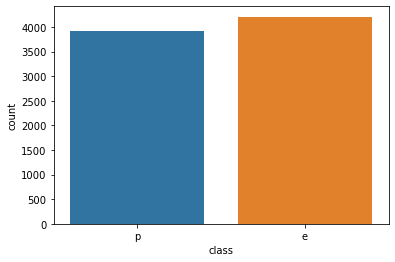

In [7]:
sns.countplot(data=df,x='class')
plt.show()

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [14]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## X & y

In [16]:
X=pd.get_dummies(df.drop('class',axis=1),drop_first=True)
y=df['class']

In [17]:
X.shape,y.shape

((8124, 95), (8124,))

## Train Test | Split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

## Modelling 
### Grandint Boosting with default parameters

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

### Prediction

In [22]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

## Evaluation

### Accuracy

In [23]:
from sklearn.metrics import accuracy_score
print("Train accuracy: ",accuracy_score(y_train,train_pred))
print("Test accuracy: ",accuracy_score(y_test,test_pred))

Train accuracy:  0.9996922603477458
Test accuracy:  0.9993846153846154


### Confusion Matrix

C:\Users\KIRTI RAJ PRADHAN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


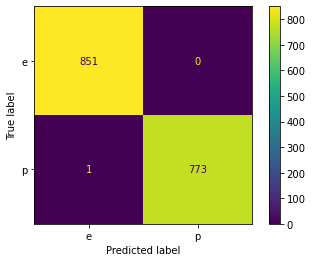

In [27]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(model,X_test,y_test))
plt.show()

### Classification Report

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Cross Validation Score

In [33]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print(scores)
print(scores.mean())

[0.84246154 1.         1.         1.         0.75369458]
0.9192312239484653


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator = GradientBoostingClassifier()
param_grid={'n_estimators':list(range(1,100)),'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}

In [41]:
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 1],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [42]:
grid.best_params_

{'learning_rate': 0.4, 'n_estimators': 40}

## Final Model

In [43]:
gb_model=GradientBoostingClassifier(n_estimators=40,learning_rate=0.5)
gb_model.fit(X_train,y_train)

y_train_pred=gb_model.predict(X_train)
y_test_pred=gb_model.predict(X_test)

print("Train accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test accuracy: ",accuracy_score(y_test,y_test_pred))

Train accuracy:  1.0
Test accuracy:  1.0


## Feature Importance

In [46]:
gb_model.feature_importances_

array([1.40010963e-04, 1.30994497e-16, 8.84395589e-18, 0.00000000e+00,
       0.00000000e+00, 1.28744498e-03, 1.50265170e-05, 5.14618819e-05,
       2.86767688e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50864898e-11,
       4.00565048e-03, 4.95400243e-02, 1.66731484e-04, 2.00511083e-02,
       1.85945411e-02, 1.32175358e-05, 6.29333269e-01, 1.09554911e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.82695273e-03,
       2.67799160e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.32404168e-16, 1.10873355e-17,
       2.50388147e-07, 7.82892321e-05, 1.35971789e-01, 0.00000000e+00,
       5.77031478e-02, 1.02335109e-03, 0.00000000e+00, 2.39024180e-05,
       0.00000000e+00, 0.00000000e+00, 2.49876720e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.63134890e-04, 0.00000000e+00,
      

In [49]:
imp_feats = pd.DataFrame(index=X.columns,data=gb_model.feature_importances_,columns=['Importance'])
imp_feats

,Importance
cap-shape_c,1.400110e-04
cap-shape_f,1.309945e-16
cap-shape_k,8.843956e-18
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,8.962687e-04
habitat_m,3.329652e-17
habitat_p,0.000000e+00
habitat_u,5.605134e-08


In [50]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.01]

In [51]:
imp_feats

,Importance
bruises_t,0.049540
odor_f,0.020051
odor_l,0.018595
odor_n,0.629333
odor_p,0.010955
stalk-root_c,0.135972
stalk-root_r,0.057703
stalk-surface-below-ring_y,0.024988
spore-print-color_r,0.028989


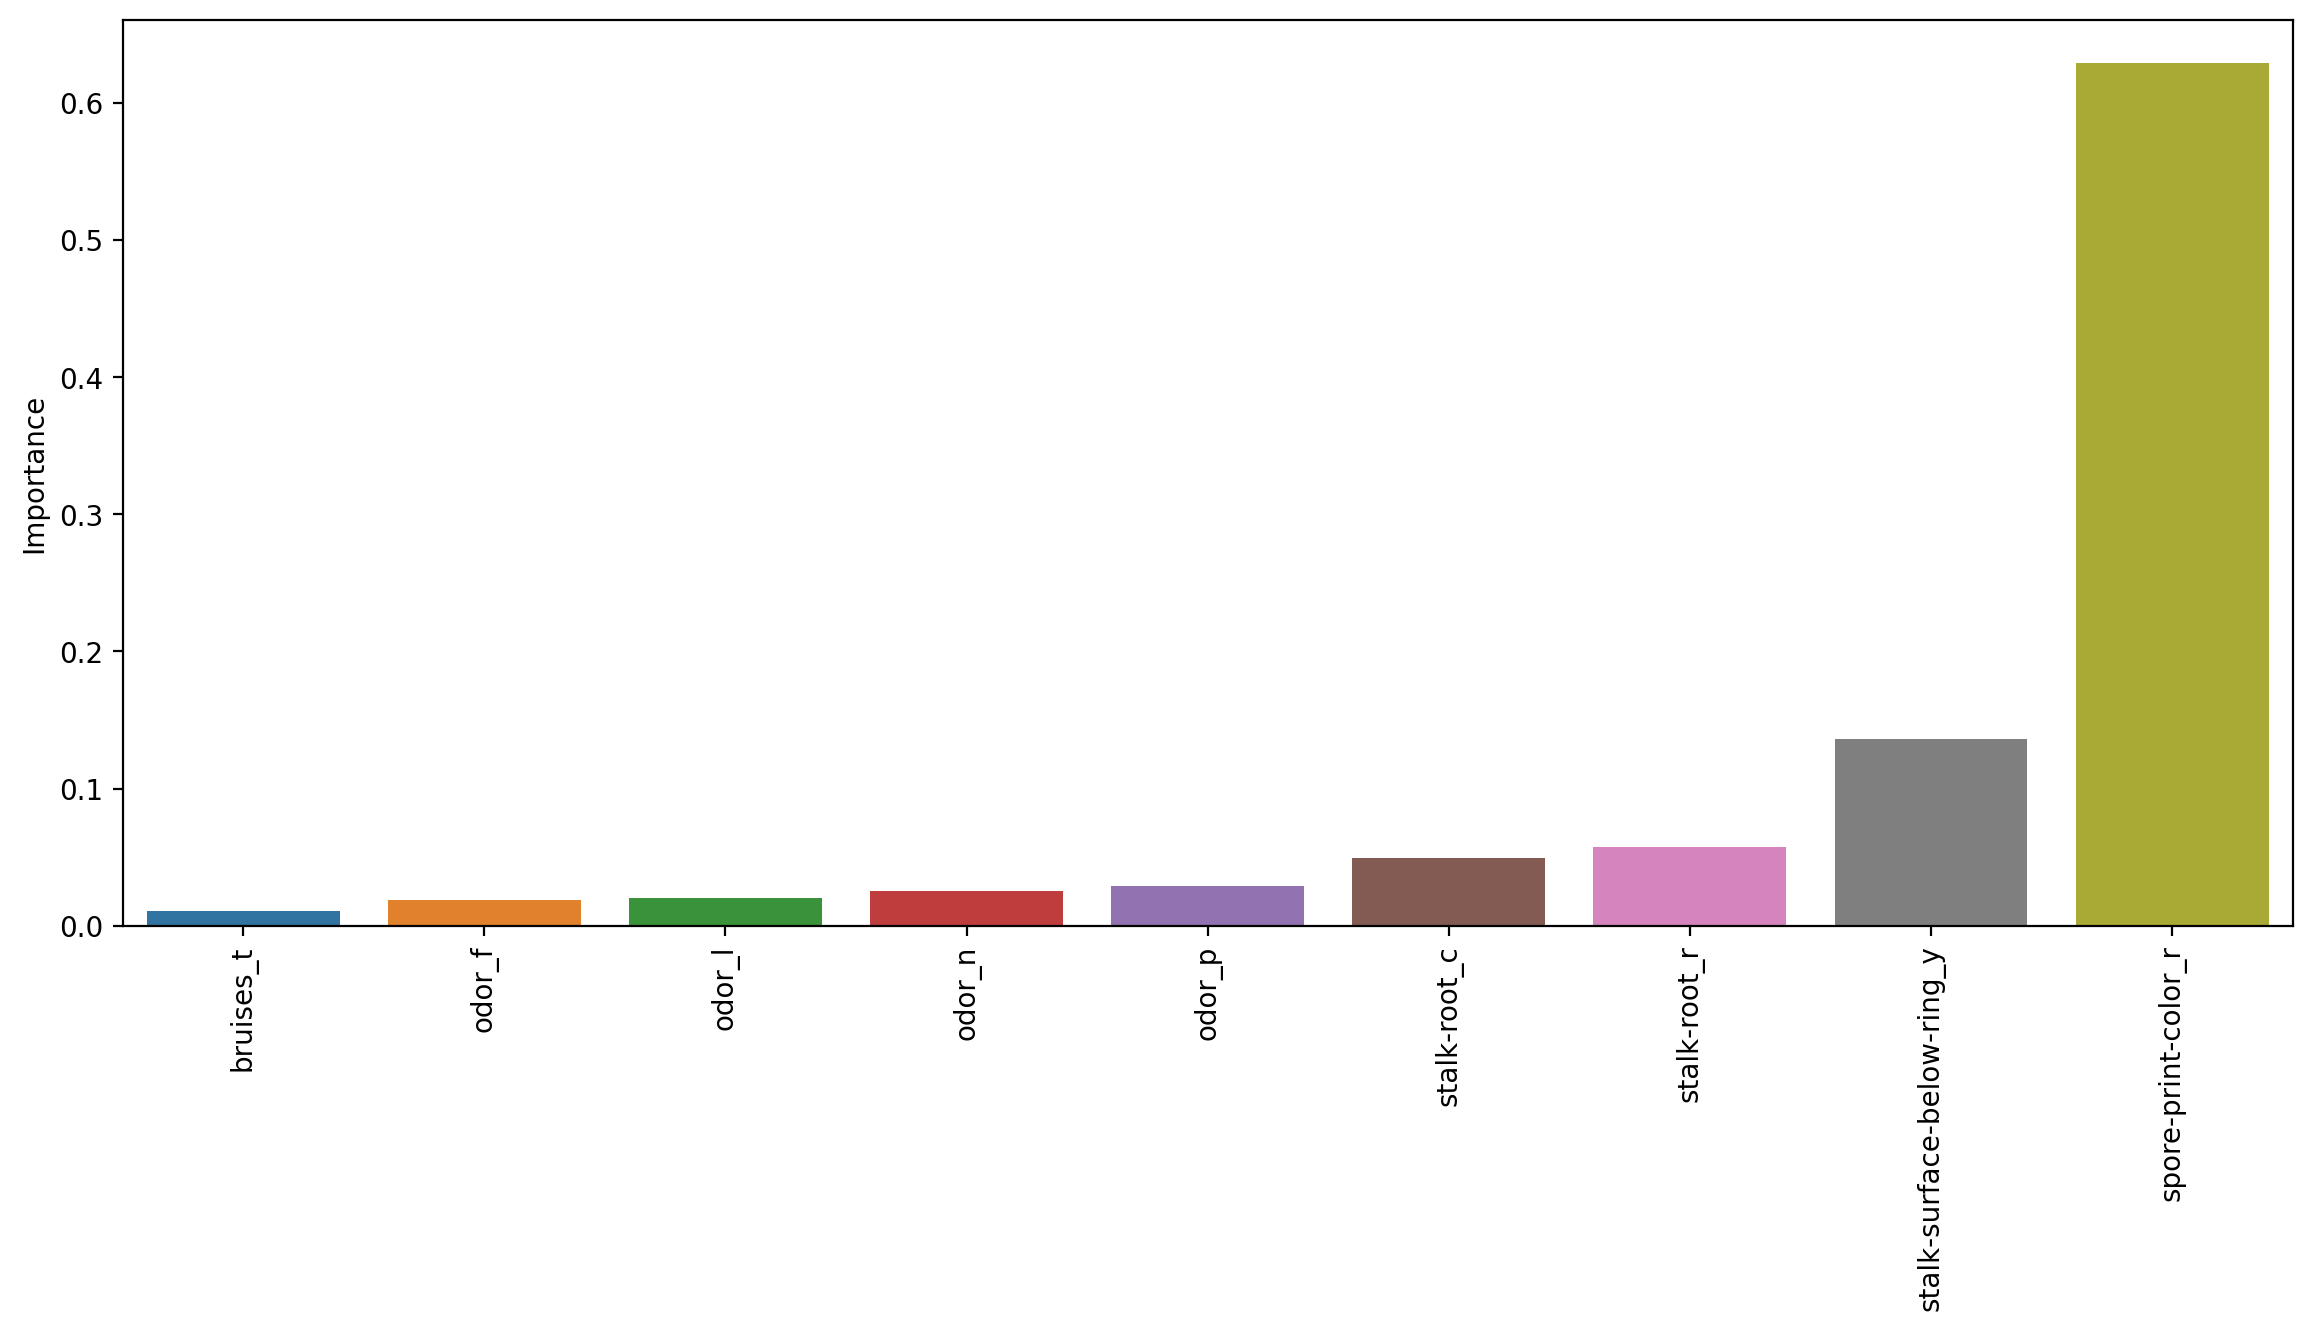

In [54]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);